## Firstly, I am trying to figure out how to use Dan Foreman Mackey's "exoplanet" library, so lets try it out.
### Link to the library: https://docs.exoplanet.codes/en/latest/

### I have literally no idea where to begin :::- Date: 15 dec--2021
#### I am trying to learn from: https://docs.exoplanet.codes/en/latest/tutorials/data-and-models/#orbital-conventions

In [1]:
## Lets Bring some library
import matplotlib.pyplot as plt
import exoplanet as xo
import numpy as np
import scipy.stats as ss
## I guess this will be enough

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


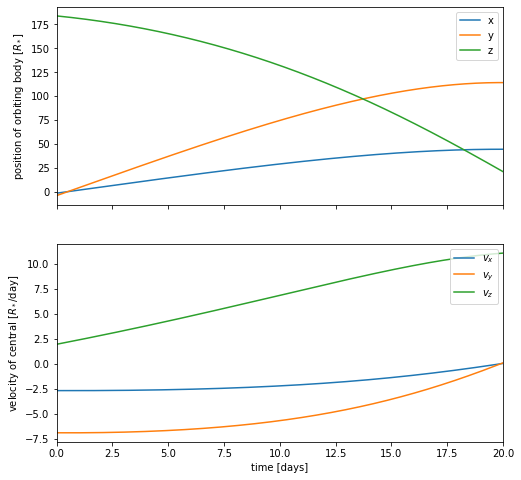

In [4]:
# Define the orbit
orbit = xo.orbits.KeplerianOrbit(
    period=100,  # All times are in days
    t0=0.5,
    incl=0.5 * np.pi,  # All angles are in radians
    ecc=0.3,
    omega=-2.5,
    Omega=1.2,
    m_planet=5,  # All masses and distances are in Solar units
)

# Get the position and velocity as a function of time
t = np.linspace(0, 20, 5000)
x, y, z = orbit.get_relative_position(t)
vx, vy, vz = orbit.get_star_velocity(t)

# Plot the coordinates
# Note the use of `.eval()` throughout since the coordinates are all
# Aesara/Theano objects
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
ax = axes[0]
ax.plot(t, x.eval(), label="x")
ax.plot(t, y.eval(), label="y")
ax.plot(t, z.eval(), label="z")
ax.set_ylabel("position of orbiting body [$R_*$]")
ax.legend(fontsize=10, loc=1)

ax = axes[1]
ax.plot(t, vx.eval(), label="$v_x$")
ax.plot(t, vy.eval(), label="$v_y$")
ax.plot(t, vz.eval(), label="$v_z$")
ax.set_xlim(t.min(), t.max())
ax.set_xlabel("time [days]")
ax.set_ylabel("velocity of central [$R_*$/day]")
_ = ax.legend(fontsize=10, loc=1)

